In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np


In [106]:
Data_set =np.loadtxt('./data/ThoraricSurgery3.csv',delimiter=',')
Data_set.shape #x의 요소 -> 0~15,y의 값 ->16
X=Data_set[:,0:16]
y=Data_set[:,16]



In [107]:
model=Sequential()
model.add(Dense(30, input_dim=16, activation='relu'))  
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X, y, batch_size=16,epochs=5)


Epoch 1/5
30/30 [==============================] - 1s 2ms/step - loss: 0.7948 - accuracy: 0.8468
Epoch 2/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4594 - accuracy: 0.8468
Epoch 3/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4397 - accuracy: 0.8511
Epoch 4/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4438 - accuracy: 0.8511
Epoch 5/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4412 - accuracy: 0.8511


In [108]:
#11장 데이터 다루기 
import pandas as pd
df=pd.read_csv('./data/pima-indians-diabetes3.csv')
df.describe()


,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [109]:
#각요소간의 상관관계
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


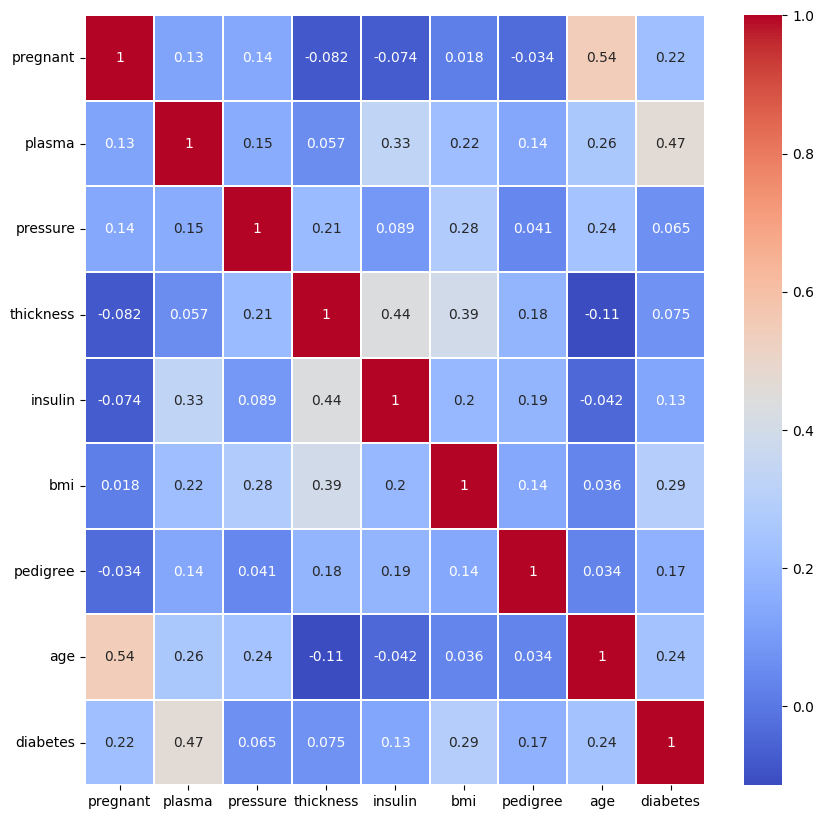

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm",linewidths=0.1)
plt.yticks(rotation=0)

plt.show()
#matplotlib.colormaps() -<컬러 정보

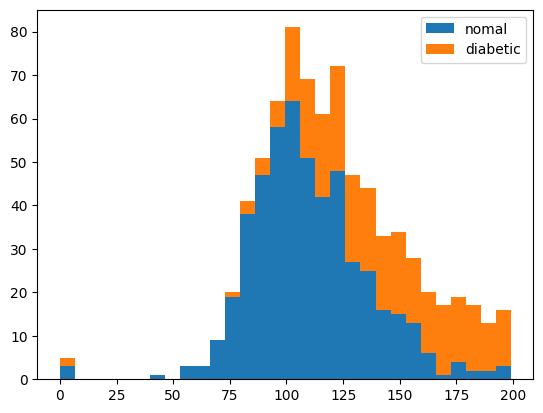

In [111]:
#plasma 속성에 대한 막대그래프 작성
X=[df.plasma[df.diabetes==0],df.plasma[df.diabetes==1]]
plt.hist(x=X,bins=30,histtype='barstacked',label=['nomal','diabetic'])
plt.legend()
plt.show()

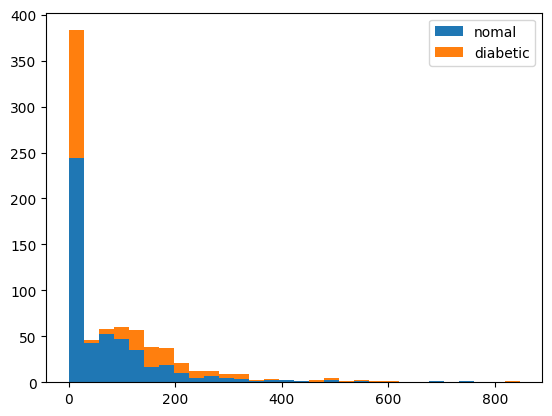

In [112]:
X=[df.insulin[df.diabetes==0],df.insulin[df.diabetes==1]]
plt.hist(x=X,bins=30,histtype='barstacked',label=['nomal','diabetic'])
plt.legend()
plt.show()

In [113]:
X=df.loc[:,['plasma','insulin','bmi','age']]
y=df.iloc[:,8]
print(X.shape);print(y.shape)

(768, 4)
(768,)


In [114]:
#딥러닝 모델을 생성하고, 모델을 실행
#첫번째 layer node수 ->20, 활성함수 relu
#첫번째 layer node수 ->10, 활성함수 relu
#출력층 추가
#모델의 구조 확인 -> model.summary()
#옵티마지어 , 실행횟수, 손실함수를 임의로 설정해서 모델을실행
model=Sequential()
model.add(Dense(20,input_dim=4,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X,y,batch_size=32,epochs=500)


Epoch 1/500
24/24 [==============================] - 1s 2ms/step - loss: 3.9629 - accuracy: 0.4818
Epoch 2/500
24/24 [==============================] - 0s 1ms/step - loss: 1.3134 - accuracy: 0.5859
Epoch 3/500
24/24 [==============================] - 0s 1ms/step - loss: 1.0383 - accuracy: 0.5885
Epoch 4/500
24/24 [==============================] - 0s 1ms/step - loss: 0.9374 - accuracy: 0.5690
Epoch 5/500
24/24 [==============================] - 0s 1ms/step - loss: 0.8618 - accuracy: 0.5703
Epoch 6/500
24/24 [==============================] - 0s 1ms/step - loss: 0.8123 - accuracy: 0.5221
Epoch 7/500
24/24 [==============================] - 0s 2ms/step - loss: 0.8033 - accuracy: 0.5690
Epoch 8/500
24/24 [==============================] - 0s 2ms/step - loss: 0.7632 - accuracy: 0.5690
Epoch 9/500
24/24 [==============================] - 0s 1ms/step - loss: 0.7354 - accuracy: 0.5924
Epoch 10/500
24/24 [==============================] - 0s 2ms/step - loss: 0.7306 - accuracy: 0.5885
Epoch 11/

In [115]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 20)                100       
                                                                 
 dense_79 (Dense)            (None, 10)                210       
                                                                 
 dense_80 (Dense)            (None, 1)                 11        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [116]:
from sklearn.datasets import load_breast_cancer
Data= load_breast_cancer()
X=Data['data']
y=Data['target']
X.shape,y.shape
import matplotlib
matplotlib.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

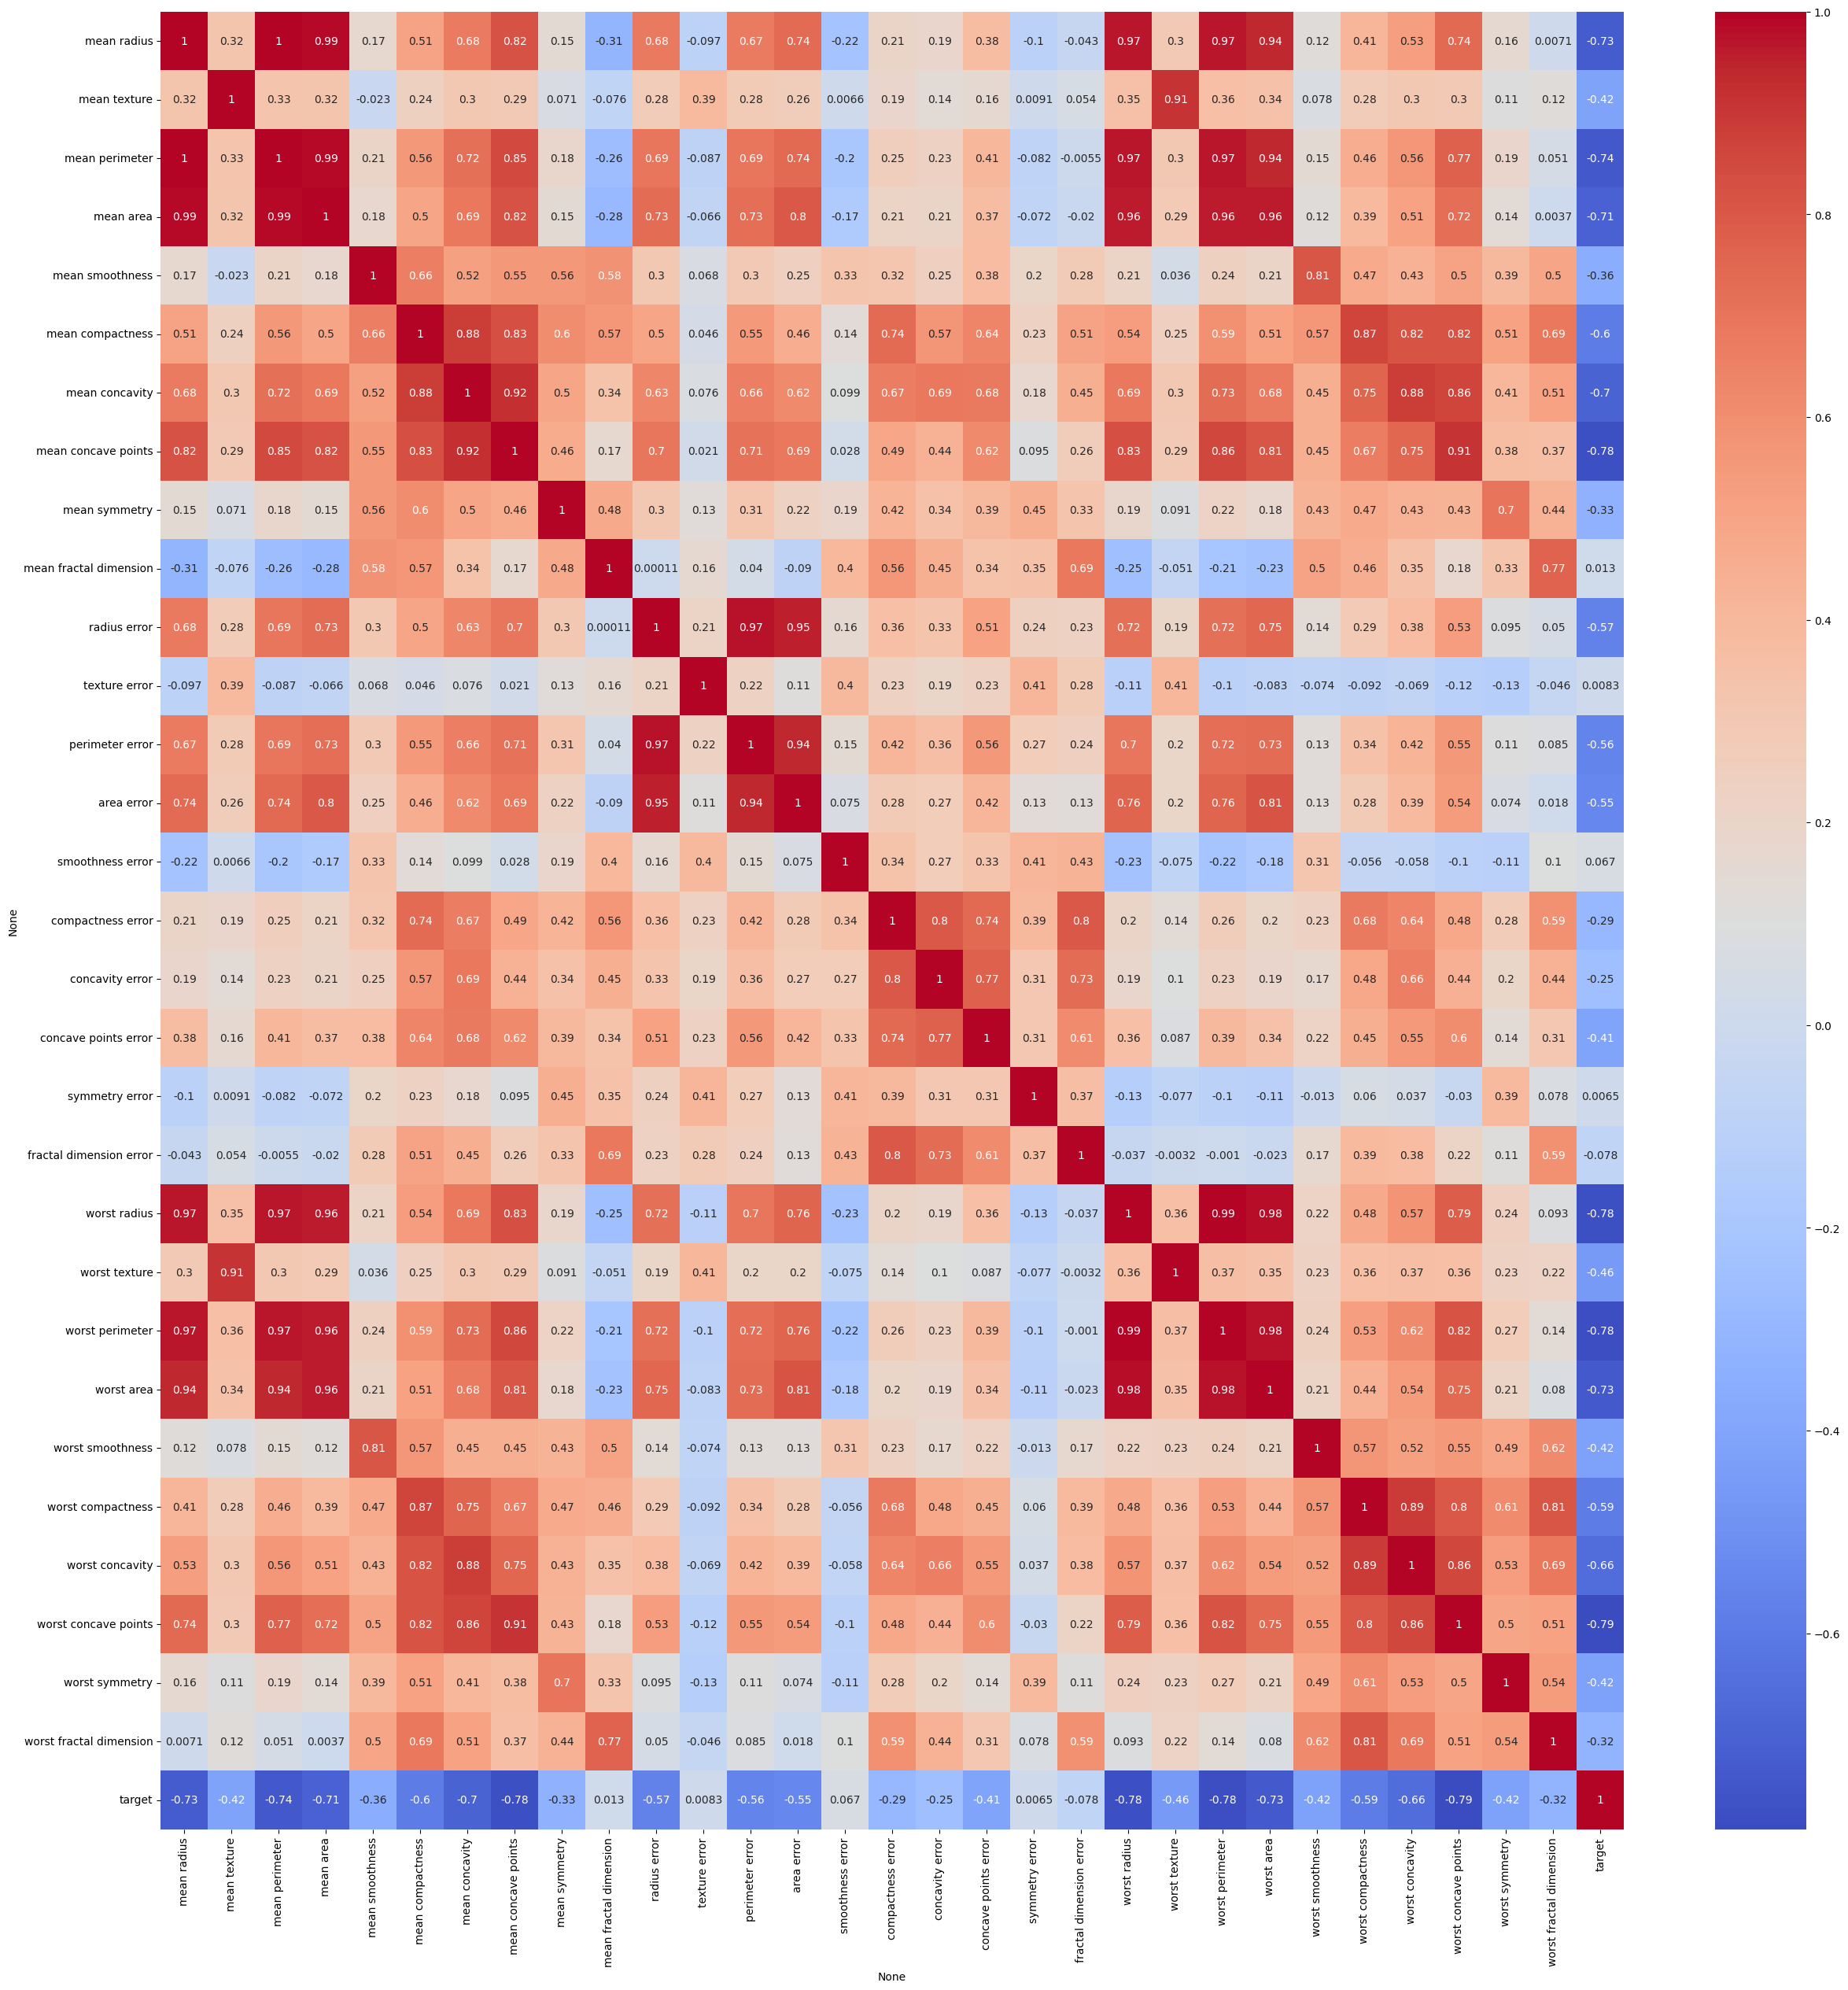

In [117]:
df=pd.DataFrame(X)
df.columns=[Data['feature_names']]
df['target']=y
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

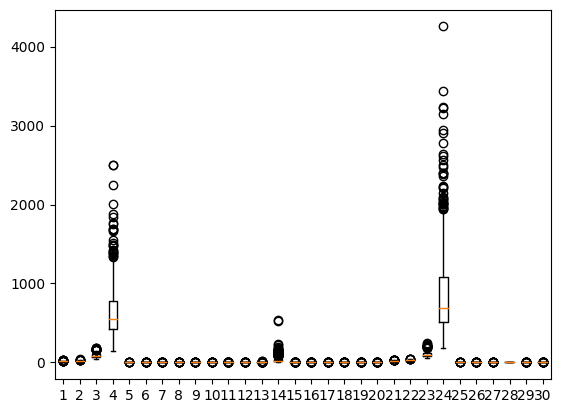

In [118]:
plt.boxplot(X)
plt.show()

In [151]:
df.iloc[:,[3,2, 13, 23,22]]
df.drop(['mean area','mean perimeter','area error','worst area','worst perimeter'],axis=1)

C:\Users\hunmi\AppData\Local\Temp\ipykernel_29880\3475544197.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df.drop(['mean area','mean perimeter','area error','worst area','worst perimeter'],axis=1)


,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,...,fractal dimension error,worst radius,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.006193,25.380,17.33,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.003532,24.990,23.41,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.004571,23.570,25.53,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.009208,14.910,26.50,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.005115,22.540,16.67,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,...,0.004239,25.450,26.40,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,...,0.002498,23.690,38.25,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,...,0.003892,18.980,34.12,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,...,0.006185,25.740,39.42,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [119]:
model=Sequential()
model.add(Dense(50,input_dim=30,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) #ctrl + space or F12 는 함수 정의 
history=model.fit(X,y,batch_size=100,epochs=2000,verbose=False)




In [120]:
print(history.history['loss'][-1],history.history['accuracy'][-1])
x_name =Data['feature_names'][[3,13,23]]
print(x_name)
np.unique(y) #사전확인 꼭필요

0.052717939019203186 0.9789103865623474
['mean area' 'area error' 'worst area']


array([0, 1])

In [137]:
X = df.iloc[:,[3,2, 13, 23,22]]
X.columns = ['x1','x2','x3','x4','x5']
df.drop(['x1','x2','x3','x4','x5'],axis=1,)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [135]:
X = df.iloc[:,:]
model1=Sequential()
model1.add(Dense(50,input_dim=5,activation='relu'))
model1.add(Dense(50,activation='relu'))
model1.add(Dense(30,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model1.fit(X,y,batch_size=100,epochs=2000,verbose=False)
print(history.history['loss'][-1],history.history['accuracy'][-1])


ValueError: in user code:

    File "c:\Users\hunmi\anaconda3\envs\py3.8\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\hunmi\anaconda3\envs\py3.8\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\hunmi\anaconda3\envs\py3.8\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\hunmi\anaconda3\envs\py3.8\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\hunmi\anaconda3\envs\py3.8\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\hunmi\anaconda3\envs\py3.8\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_28" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 31)


In [ ]:
df.drop([''])